# Regressão Linear

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config Inlinebacken.figure_format = 'svg'

***Leitura dos dados***

In [6]:
X = np.array([0,1,2,3])
y = np.array([0,1,2,3])

**Representando uma reta**

In [7]:
def predict(alpha, beta, X):
    return alpha*X + beta

In [9]:
alpha = 1 #Inclinação da reta
beta = 0

ÿ = predict(alpha=alpha, beta=beta, X=X)
ÿ

array([0, 1, 2, 3])

Text(0, 2.9, 'Alpha=0 e Beta=0')

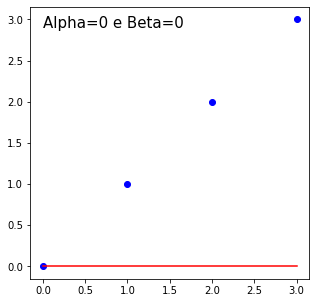

In [10]:
alpha = 0 #Inclinação da reta
beta = 0

ÿ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ÿ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

Text(0, 2.9, 'Alpha=0.25 e Beta=0')

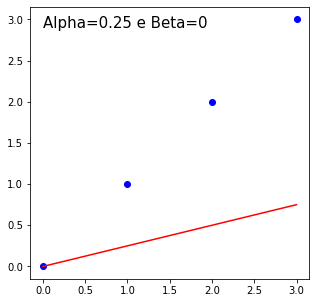

In [11]:
alpha = 0.25 #Inclinação da reta
beta = 0

ÿ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ÿ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

Text(0, 2.9, 'Alpha=0.5 e Beta=0')

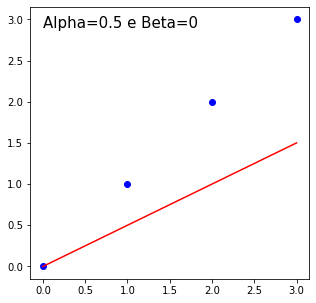

In [12]:
alpha = 0.50 #Inclinação da reta
beta = 0

ÿ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ÿ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

Text(0, 2.9, 'Alpha=0.5 e Beta=1')

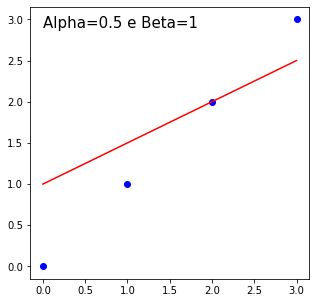

In [13]:
alpha = 0.50 #Inclinação da reta
beta = 1

ÿ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ÿ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

Text(0, 2.9, 'Alpha=0.5 e Beta=2')

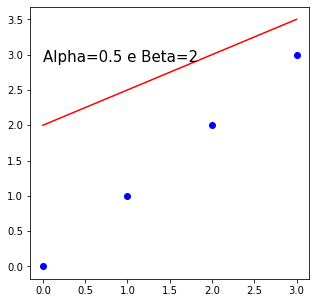

In [14]:
alpha = 0.50 #Inclinação da reta
beta = 2

ÿ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ÿ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

Text(0, 2.9, 'Alpha=1 e Beta=0')

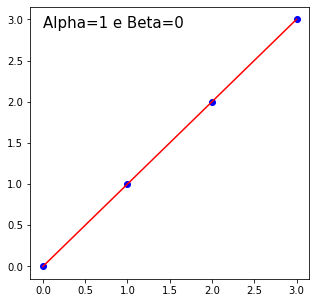

In [8]:
alpha = 1 #Inclinação da reta
beta = 0

ÿ = predict(alpha=alpha, beta=beta, X=X)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ÿ, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(alpha, beta), fontdict={'size': 15})

## Escolhendo o melhor alpha e beta

In [21]:
tamanho = len(X)

X_b = np.c_[np.ones((tamanho, 1)), X] # add x0 = 1 to each instance
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.]])

In [22]:
X_b.T

array([[1., 1., 1., 1.],
       [0., 1., 2., 3.]])

In [23]:
#métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([4.4408921e-16, 1.0000000e+00])

In [24]:
alpha = theta_best[1] #inclinação da reta
beta = theta_best[0]

In [25]:
ÿ = predict(alpha=alpha, beta=beta, X=X)

Text(0, 2.9, 'Alpha=1.0 e Beta=0.0')

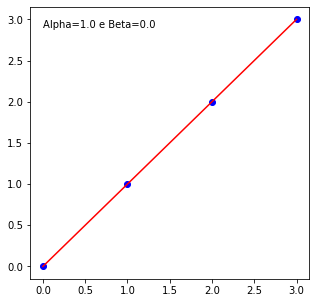

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,y, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(round(alpha,2), round(beta,0), fontdict={'size':15}))

Text(0, 2.9, 'Alpha=1.0 e Beta=0.0')

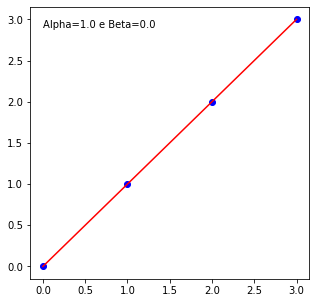

In [27]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,y, 'r')
plt.text(0,2.90,'Alpha={} e Beta={}'.format(round(alpha,3), round(beta,3), fontdict={'size':15}))

## Avaliando Modelos de regressão

In [28]:
from sklearn import metrics
import numpy as np

Leitura dos dados 

In [44]:
y_test = np.array([1,2,3,4])
ÿ = np.array([1,2,3,2])

### 1. MAE

- Calcula o erro absoluto médio entre valores preditos e reais
- Interpretação mais intuitiva
- Não pune severamente os outliers do modelo
- Medida não ideal para lidar com problemas delicados 


In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, ÿ))

MAE: 0.5


### 2. MSE
- Calcula o erro das previsões ao quadrado
- Valores muitos distantes do real, aumenta o valor da medida muito facilmente
- Dificuldade para interpretação direta

In [46]:
print('MSE:', metrics.mean_squared_error(y_test, ÿ))

MSE: 1.0


### 3. RMSE
- Calcula a raiz do erro média quadrático:
- Interpretabilidade melhorada em relação ao MSE 
- Penaliza predições muito distante do real

In [48]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ÿ)))

RMSE: 1.0


### 4. MAPE
- Calcula um erro absoluto em porcentagem
- Intuitiva para a interpretação do programador 
- Pode ser ruim quando o problema possui um grande alcance de número onde a variável predita varia de 0 a 20000, por exemplo.

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
mean_absolute_percentage_error(y_test, ÿ)

12.5

### 4. R Quadrado
- Mede o quão próximo as medidas reais estão do nosso modelo
- Se aplica apenas a modelo univariados (X == 1)
- Pode ser enviado por que utilizamos a correlação dos dados
- Muito utilizada na área de financias

In [51]:
print('R:', metrics.r2_score(y_test,ÿ))

R: 0.19999999999999996


### 5. R Quadrado ajustado
- Representa a porcentagem da variância  sem viés devido ao acréscimo de novas features:
- Avalia modelos com mais precisão e segurança
- Pode ser utilizada em modelos com mais de uma feature (X > 1)
- Usado para modelos mais simples que considera os valores encontrados pelo modelo a soma de um erro residual.


In [52]:
def adjusted_R(y,ÿ,N):
    adj_r = (1-((1-metrics.r2_score(y,ÿ)) * (len(y)-1))/ (len(y)-N-1))
    return adj_r
print('R-adjust: ', adjusted_R(y_test,ÿ,1))

R-adjust:  -0.20000000000000018


## Como utilizar o algorítmo

### Leitura dos dados
- X representa os M² do apartamento que possuem uma variação de 40m² até 120 m²
- y é o preço do apartamento

In [53]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150,size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

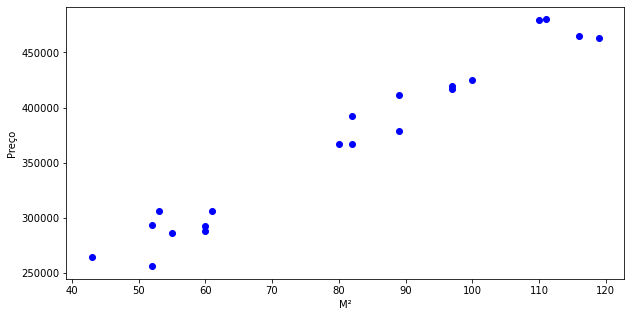

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y,c='b')
plt.xlabel('M²')
plt.ylabel('Preço')

Representando uma Reta

In [65]:
def predict(alpha, beta, X):
    return alpha*X + beta

Escolhendo melhor alpha e beta

In [69]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X] # add x0 = 1 to each instance
X_b

array([[  1.,  89.],
       [  1., 119.],
       [  1., 110.],
       [  1.,  89.],
       [  1.,  43.],
       [  1., 116.],
       [  1.,  52.],
       [  1.,  97.],
       [  1., 100.],
       [  1.,  60.],
       [  1., 111.],
       [  1.,  52.],
       [  1.,  82.],
       [  1.,  53.],
       [  1.,  97.],
       [  1.,  82.],
       [  1.,  80.],
       [  1.,  61.],
       [  1.,  55.],
       [  1.,  60.]])

In [70]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[122578.39606911],
       [  3051.88562103]])

Ajustando a reta

In [71]:
alpha = theta_best[1] # inclinação
beta = theta_best[0]
ÿ = predict(alpha=alpha, beta=beta, X=X)

In [72]:
ÿ

array([[394196.21634087],
       [485752.78497179],
       [458285.81438252],
       [394196.21634087],
       [253809.47777344],
       [476597.1281087 ],
       [281276.44836272],
       [418611.30130911],
       [427766.95817221],
       [305691.53333097],
       [461337.70000355],
       [281276.44836272],
       [372833.01699365],
       [284328.33398375],
       [418611.30130911],
       [372833.01699365],
       [366729.24575159],
       [308743.418952  ],
       [290432.10522581],
       [305691.53333097]])

Plotando os Dados

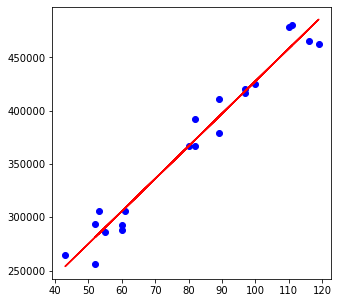

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,ÿ, 'r');

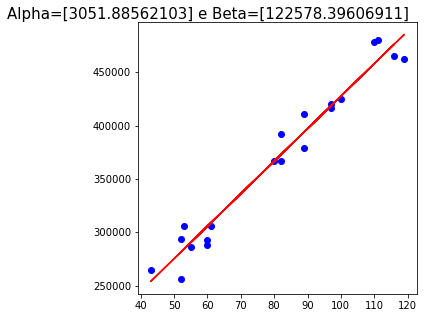

In [80]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,ÿ, 'r')
plt.text(0,500000, 'Alpha={} e Beta={}'.format(alpha,beta),fontdict={'size':15});

### Como implementar uma regressão linear usando o Scikit-learn?

In [81]:
from sklearn.linear_model import LinearRegression

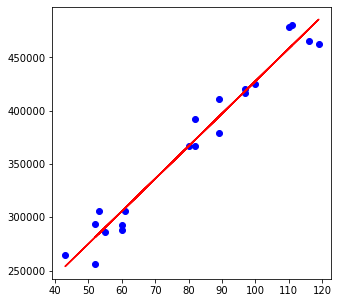

In [82]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,ÿ,'r')

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(X, y)

LinearRegression()

In [86]:
ÿ = lr.predict(X)

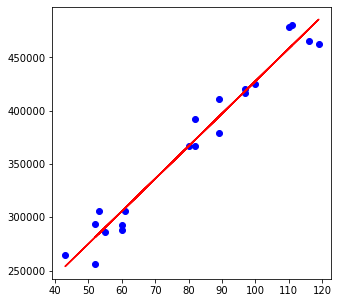

In [87]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X,ÿ,'r')

In [90]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.96


**Avaliando o meu modelo de regressão**

In [91]:
from sklearn import metrics

In [92]:
print('MAE: ', metrics.mean_absolute_error(y, ÿ))
print('MSE: ', metrics.mean_squared_error(y, ÿ))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, ÿ)))

MAE:  12259.244509880436
MSE:  212669845.58484402
RMSE:  14583.204229004134
